In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [21]:
df=pd.DataFrame({'area':[2600, 3000, 3200, 3600, 4000], 'price':[550000, 565000, 610000, 680000, 725000]})

In [22]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [23]:
%matplotlib inline

# Scatter plot to understand data

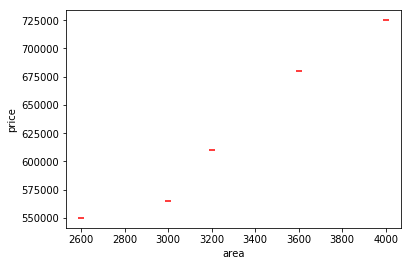

In [24]:
_=plt.scatter(df.area, df.price, color='red', marker='_')
_=plt.xlabel('area')
_=plt.ylabel('price')

## Creating linear regression variable from sklearn

In [25]:
linear_reg = linear_model.LinearRegression()
# fit data - training the model.
linear_reg.fit(df[['area']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict the price of the home which is 3300 square feet

In [26]:
linear_reg.predict(3300)

array([[628715.75342466]])

## Linear regression calculated coefficient and intercept

In [27]:
linear_reg.coef_ # m in y=mx+c

array([[135.78767123]])

In [28]:
linear_reg.intercept_ # c in y=mx+c

array([180616.43835616])

In [29]:
m=linear_reg.coef_
c=linear_reg.intercept_
x_ex=3300
y_ex = m*x_ex+c

In [30]:
y_ex

array([[628715.75342466]])

## Predicting for 5000 sqft

In [31]:
linear_reg.predict(5000)

array([[859554.79452055]])

# Pickling / saving model

In [32]:
# import module pickle
import pickle

In [38]:
# create pickle file
# write binary data
with open('model_pickle', 'wb') as f:
    # pickle.dump allows linear_reg to be saved into f
    pickle.dump(linear_reg, f)
    
# model is saved into model_pickle file now

# Loading model from saved pickle

In [40]:
# open pickle file and load the model
with open('model_pickle', 'rb') as model_file:
    model = pickle.load(model_file)

In [42]:
# using model object to predict again
model.predict(5000)
# we recieve same output as above

array([[859554.79452055]])

In [34]:
areas_to_predict = {'area':[1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]}
df_for_prediction = pd.DataFrame(areas_to_predict)

## Prediction on areas imported

In [35]:
predicted_areas = linear_reg.predict(df_for_prediction[['area']])
df_for_prediction['prices'] = predicted_areas

In [36]:
df_for_prediction

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


## How does the linear regression line look ?

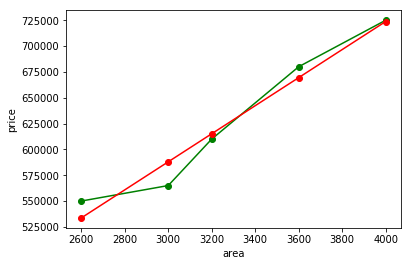

In [37]:
_=plt.plot(df.area, df[['price']], '-o', color='green')
_=plt.plot(df.area, linear_reg.predict(df[['area']]), '-o', color='red')
_=plt.xlabel('area')
_=plt.ylabel('price')

# Using joblib to store model

In [50]:
from sklearn.externals import joblib

In [51]:
joblib.dump(linear_reg, 'joblib_model_file.pkl')

['joblib_model_file.pkl']

In [52]:
model_from_joblib = joblib.load('joblib_model_file.pkl')

In [53]:
model_from_joblib.predict(5000)

array([[859554.79452055]])

# sklearn advises to use joblib for efficiently storing numpy arrays.